# Predictive Modeling of Earthquake Occurrences with Feature Engineering and Machine Learning

## Step1: Importing Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')
from sklearn.utils import resample
import os
import joblib
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix, classification_report)

## Step2: Importing dataset

In [2]:
df = pd.read_csv('usgs_main.csv')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.0,0.004494,0.04,...,2022-03-04T21:29:36.906Z,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.0,0.016320,0.02,...,2022-03-04T21:29:02.128Z,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.0,0.159000,0.01,...,2022-03-04T21:26:56.893Z,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.0,0.020530,0.13,...,2022-03-04T21:24:10.449Z,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.52,...,2022-03-04T21:22:15.794Z,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


In [4]:
df.shape

(75810, 22)

In [5]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75810 entries, 0 to 75809
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             75810 non-null  object 
 1   latitude         75810 non-null  float64
 2   longitude        75810 non-null  float64
 3   depth            75810 non-null  float64
 4   mag              75796 non-null  float64
 5   magType          75796 non-null  object 
 6   nst              59660 non-null  float64
 7   gap              62685 non-null  float64
 8   dmin             49640 non-null  float64
 9   rms              75792 non-null  float64
 10  net              75810 non-null  object 
 11  id               75810 non-null  object 
 12  updated          75810 non-null  object 
 13  place            75810 non-null  object 
 14  type             75810 non-null  object 
 15  horizontalError  56668 non-null  float64
 16  depthError       75742 non-null  float64
 17  magError    

In [7]:
df['place'].unique()

array(['3km SW of Anderson Springs, CA', '8km NW of The Geysers, CA',
       '11km SE of Shandon, CA', ..., '14 km NW of Sutcliffe, Nevada',
       '20km ESE of Julian, CA', '17 km E of Amahai, Indonesia'],
      dtype=object)

In [8]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                   14
magType               14
nst                16150
gap                13125
dmin               26170
rms                   18
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    19142
depthError            68
magError           17061
magNst             13161
status                 0
locationSource         0
magSource              0
dtype: int64

In [9]:
df.corr()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.413167,-0.186494,-0.499412,-0.342950,0.056389,-0.460296,0.075543,-0.476918,-0.002368,-0.135410,-0.194317
longitude,-0.413167,1.000000,0.141598,0.561458,0.272927,-0.040972,0.422834,0.226027,0.590379,0.008262,-0.216657,0.293495
depth,-0.186494,0.141598,1.000000,0.363835,0.283888,-0.037508,0.245117,0.321885,0.510381,0.006786,0.003757,0.285730
mag,-0.499412,0.561458,0.363835,1.000000,0.584952,-0.079583,0.530890,0.523658,0.714211,0.009838,0.030323,0.460093
nst,-0.342950,0.272927,0.283888,0.584952,1.000000,-0.366167,0.329655,0.465571,0.339125,-0.038374,0.168507,0.535861
gap,0.056389,-0.040972,-0.037508,-0.079583,-0.366167,1.000000,-0.022947,-0.085639,0.084681,0.098870,0.030217,-0.147119
dmin,-0.460296,0.422834,0.245117,0.530890,0.329655,-0.022947,1.000000,0.462490,0.627181,0.021772,-0.135969,0.333287
rms,0.075543,0.226027,0.321885,0.523658,0.465571,-0.085639,0.462490,1.000000,0.744192,0.011426,-0.082731,0.459174
horizontalError,-0.476918,0.590379,0.510381,0.714211,0.339125,0.084681,0.627181,0.744192,1.000000,0.229391,-0.115588,0.414065
depthError,-0.002368,0.008262,0.006786,0.009838,-0.038374,0.098870,0.021772,0.011426,0.229391,1.000000,-0.030490,0.017782


In [10]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

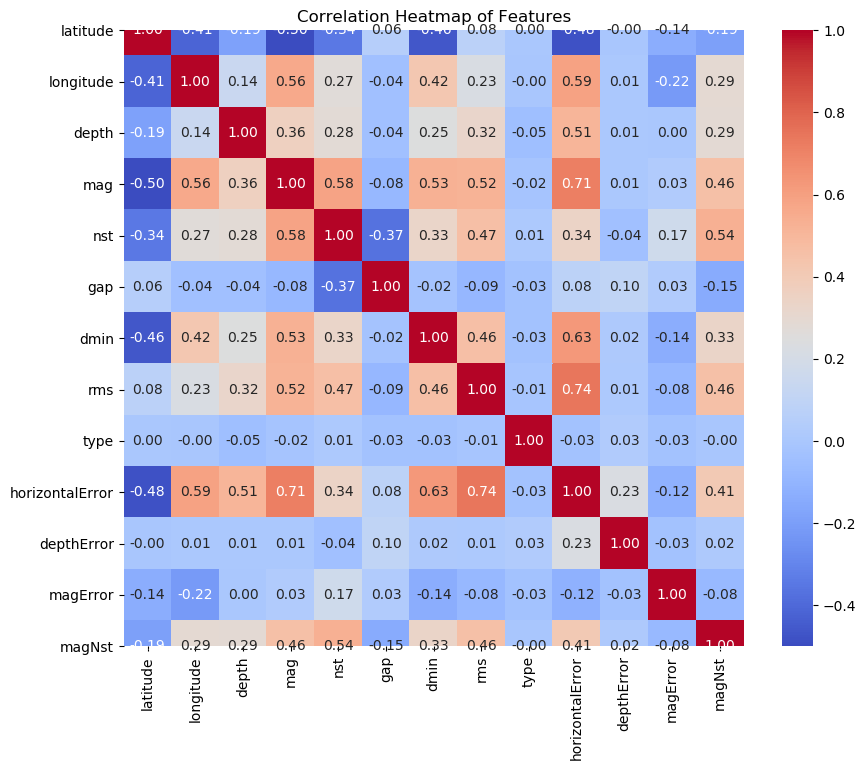

In [11]:
# Convert 'type' column to numeric if needed (e.g., using label encoding)
df['type'] = df['type'].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [12]:
# Assuming df is your DataFrame
# Identify all columns with object data type
object_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each object type column
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check the transformed DataFrame
print(df.head())

   time   latitude   longitude  depth   mag  magType   nst    gap      dmin  \
0   269  38.759666 -122.719666   1.61  1.24        5  14.0  115.0  0.004494   
1   268  38.833832 -122.815498   1.82  1.13        5  22.0   66.0  0.016320   
2   266  35.596668 -120.271332  11.57  2.31        5   5.0  178.0  0.159000   
3   265  35.929167 -117.660833   3.25  0.88        7   9.0   73.0  0.020530   
4   264  62.360200 -149.634500   9.80  1.40        7   NaN    NaN       NaN   

    rms  ...  updated  place  type  horizontalError  depthError  magError  \
0  0.04  ...      240  15840     1             0.30        0.36     0.100   
1  0.02  ...      239  26275     1             0.19        0.53     0.140   
2  0.01  ...      238   2537     1             3.14        3.51     0.760   
3  0.13  ...      236   9872     1             0.33        0.74     0.055   
4  0.52  ...      235  10430     1              NaN        0.50       NaN   

   magNst  status  locationSource  magSource  
0     5.0      

In [13]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                   14
magType                0
nst                16150
gap                13125
dmin               26170
rms                   18
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    19142
depthError            68
magError           17061
magNst             13161
status                 0
locationSource         0
magSource              0
dtype: int64

In [14]:
df = df.fillna(df.mean())

In [15]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [16]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [17]:
df_resampled = resample(df, replace=True, n_samples=100000, random_state=42)

In [18]:
df_resampled.shape

(100000, 22)

In [19]:
# Dependent and Independent varibales

In [20]:
X = df_resampled.drop(columns=['mag'])
y = df_resampled['mag']

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)